## 5th shot: Yahoo News
Start from Yahoo.finance to search company related news by searching names. Only news within three months are showed on the website so we decided to collect headings of the latest news and the articles from them. To access the polarity and the sensitivity of them by sentiment analysis. 

In [1]:
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import fnmatch
from bs4 import BeautifulSoup
import requests
data = pd.read_csv('Financial_Data.csv')
name = data['name'].to_list()
#USER_AGENT="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.149 Safari/537.36"
USER_AGENT = "Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Chrome/10.0.648.133 Safari/534.16"
headers = {"user-agent" : USER_AGENT}

In [5]:
a = Analysis(name[0])
r1 = a.run()
print(r1)

   title_sentiment  title_subjectivity  arti_sentiment  arti_subjectivity
0            0.033               0.133            -0.1                0.4


In [ ]:
query = name[0]
query = query.replace(' ', '+')

In [55]:
class headline:
    def __init__(self, term):
        self.term = term
        self.url = f'https://news.search.yahoo.com/search?q={self.term}'
        self.index = 5
    
    def run(self):
        response = requests.get(self.url)
        soup = BeautifulSoup(response.text, 'html.parser')
        results = soup.find_all('div', class_='dd NewsArticle')
        for news_item in results:
            title = news_item.find('h4').text
            blob = TextBlob(title)
            link = news_item.find('a').get('href')
            time = news_item.find('span', class_='fc-2nd').text
            # Clean time text
            #time = time.replace('·', '').encode('utf-8').strip()
            if fnmatch.fnmatch(link,'*finance.yahoo*'):
                self.index = 1
            if self.index == 1 & bool(link and link.strip()):
                arti = BeautifulSoup(requests.get(link).text,'html.parser')
                more_item = arti.find('div',class_='canvas-body')
                result = more_item.find('p')
                #result = arti.find('div',class_='canvas-body').find('p')
                #print(more_item)
                topline = TextBlob(result.get_text())
                self.index +=1
        return("{} ({}) {}".format(title, time, link))

In [56]:
b = headline(name[0])
r1 = b.run()
print(r1)

Is a Beat in the Offing for Earthstone's (ESTE) Q1 Earnings? (· 2 days ago) https://finance.yahoo.com/news/beat-offing-earthstones-este-q1-143902758.html


In [19]:
term = 'usa'
url = f'https://news.search.yahoo.com/search?q={query}'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
results = soup.find_all('div', class_='dd NewsArticle')
index = 0
for news_item in results:
    title = news_item.find('h4').text
    blob = TextBlob(title)
    #print(index)
    title_sentiment += blob.sentiment.polarity
    title_subjectivity += blob.sentiment.subjectivity
    time = news_item.find('span', class_='fc-2nd').text
    # Clean time text
    time = time.replace('·', '').strip()
    link = news_item.find('a').get('href')
    #print(link)
    if fnmatch.fnmatch(link,'*finance.yahoo*'):
        index +=1
    arti = BeautifulSoup(requests.get(link).text,'html.parser')
    more_item = arti.find('div',class_='canvas-body')
    result = more_item.find('p')
    topline = TextBlob(result.get_text())
    print("{} ({})".format(title, time))
    print("{}".format(topline))

AttributeError: 'NoneType' object has no attribute 'find'

## This is the refined code for analysis

In [12]:
query = name[0]
query = query.replace(' ', '+')

In [24]:
term = 'usa'
url = f'https://news.search.yahoo.com/search?q={query}'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
title_sentiment = 0
title_subjectivity = 0
results = soup.find_all('div', class_='dd NewsArticle')
index = 0
for news_item in results:
    title = news_item.find('h4').text
    blob = TextBlob(title)
    #print(index)
    title_sentiment += blob.sentiment.polarity
    title_subjectivity += blob.sentiment.subjectivity
    time = news_item.find('span', class_='fc-2nd').text
    # Clean time text
    time = time.replace('·', '').strip()
    link = news_item.find('a').get('href')
    #print(link)
    if fnmatch.fnmatch(link,'*finance.yahoo*'):
        index +=1
    print("{} ({}) {} {}".format(title, time, title_sentiment, title_subjectivity))
    if index == 1 & bool(link and link.strip()):
        #print(index)
        print(link)
        arti = BeautifulSoup(requests.get(link).text,'html.parser')
        more_item = arti.find('div',class_='canvas-body')
        result = more_item.find('p')
        sentiment = 0
        subjectivity = 0
        print(type(result))
        #result = more_item.find('p')
        topline = TextBlob(result.get_text())
        sentiment = topline.sentiment.polarity
        subjectivity = topline.sentiment.subjectivity
        #print(sentiment, subjectivity)
        index +=1
    print(index)
print(round(title_sentiment/ len(results),3), round(title_subjectivity/ len(results),3), round(sentiment,3), round(subjectivity,3))

In [25]:
a = article(name[0])
r1 = a.run()
print(r1)

<p class="canvas-atom canvas-text Mb(1.0em) Mb(0)--sm Mt(0.8em)--sm" content="&lt;strong&gt;EOG Resources, Inc.&amp;nbsp;&lt;/strong&gt;EOG is slated to report first-quarter 2020 results on May 7, after the closing bell." data-reactid="12" type="text"><strong>EOG Resources, Inc. </strong>EOG is slated to report first-quarter 2020 results on May 7, after the closing bell.</p>
EOG Resources, Inc. EOG is slated to report first-quarter 2020 results on May 7, after the closing bell.


In [18]:
print(link)
fnmatch.fnmatch(link,'*yahoo*')

https://finance.yahoo.com/news/eog-resources-eog-report-q1-143602691.html


True

In [ ]:
arti.find('div')

In [117]:
response.status_code

200

In [101]:
type(arti.find('div',class_='canvas-body').find('p'))

bs4.element.Tag

## Fake useragent

In [19]:
from fake_useragent import UserAgent
ua = UserAgent()

ua.chrome

'Mozilla/5.0 (Windows NT 6.2; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/32.0.1667.0 Safari/537.36'

In [20]:
#USER_AGENT="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3988.0 Safari/537.36"
USER_AGENT = ua.chrome
headers = {"user-agent" : USER_AGENT}

In [4]:
class Analysis:
    def __init__(self, term):
        self.term = term
        self.title_sentiment = 0
        self.title_subjectivity = 0
        self.arti_sentiment = 0
        self.arti_subjectivity = 0
        self.url = f'https://news.search.yahoo.com/search?q={self.term}'
        self.index = 5
    
    def run(self):
        response = requests.get(self.url)
        soup = BeautifulSoup(response.text, 'html.parser')
        results = soup.find_all('div', class_='dd NewsArticle')
        for news_item in results:
            title = news_item.find('h4').text
            blob = TextBlob(title)
            self.title_sentiment += blob.sentiment.polarity
            self.title_subjectivity += blob.sentiment.subjectivity
            link = news_item.find('a').get('href')
            if fnmatch.fnmatch(link,'*finance.yahoo*'):
                self.index = 1
            if self.index == 1 & bool(link and link.strip()):
                arti = BeautifulSoup(requests.get(link).text,'html.parser')
                #print(arti)
                more_item = arti.find('div',class_='canvas-body')
                result = more_item.find('p')
                #result = arti.find('div',class_='canvas-body').find('p')
                #print(more_item)
                topline = TextBlob(result.get_text())
                self.arti_sentiment = topline.sentiment.polarity
                self.arti_subjectivity = topline.sentiment.subjectivity
                self.index +=1
        if len(results)!=0:
            d = {'title_sentiment':round(self.title_sentiment/ len(results),3), 'title_subjectivity':round(self.title_subjectivity/ len(results),3), 'arti_sentiment':round(self.arti_sentiment,3), 'arti_subjectivity':round(self.arti_subjectivity,3)}
        else :
            d= {'title_sentiment':0, 'title_subjectivity':0, 'arti_sentiment':0, 'arti_subjectivity':0}
        df = pd.DataFrame(data=d,index = [0])
        return(df)

In [96]:
for i in range(454,566):
    term = Analysis(name[i])
    #print(term.run())
    term.run().to_csv('test3.csv', mode='a', header=False)
    #r1.append(term.run())

### test a single case

In [93]:
a = Analysis(name[454])

In [94]:
r1 = a.run()

In [95]:
type(r1)
print(r1)

   title_sentiment  title_subjectivity  arti_sentiment  arti_subjectivity
0            0.039               0.235             0.0                0.0


In [156]:
b = Analysis(name[1])
r2 = b.run()

In [157]:
r1.append(r2)

,title_sentiment,title_subjectivity,arti_sentiment,arti_subjectivity
0,0.084,0.176,0.048127,0.454697
0,0.000,0.125,0.000000,0.000000


In [251]:
type(r1)

pandas.core.frame.DataFrame

In [221]:
print(Analysis(name[0]).run())

   title_sentiment  title_subjectivity  arti_sentiment  arti_subjectivity
0         0.027656            0.116667               0                  0


## Exploratory Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [6]:
index = pd.read_csv('sentiment.csv')
index.columns

Index(['title_sentiment', 'title_subjectivity', 'art_sentiment',
       'art_subjectivity'],
      dtype='object')

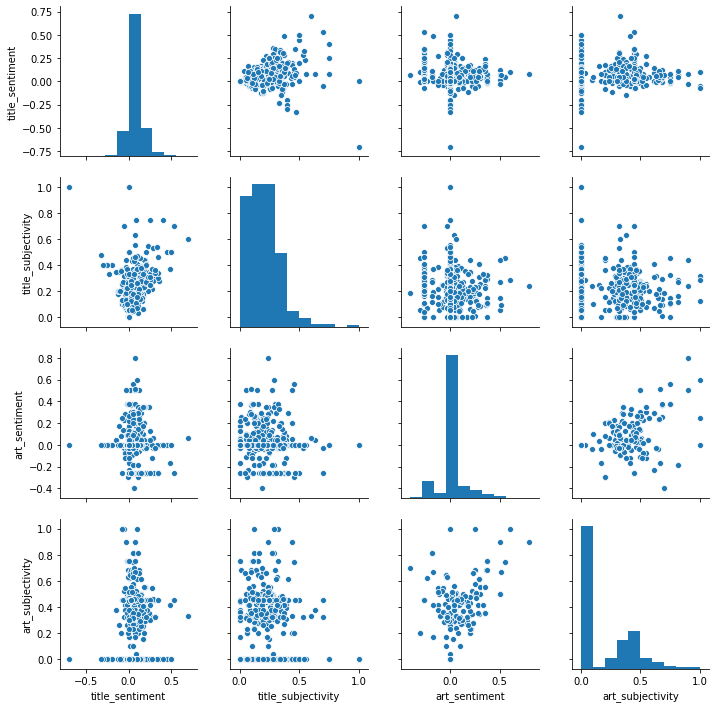

In [7]:
#histogram
sns.pairplot(index)

## below are test been ran

In [10]:
term = 'usa'
url = f'https://news.search.yahoo.com/search?q={query}'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
title_sentiment = 0
title_subjectivity = 0
results = soup.find_all('div', class_='dd NewsArticle')
index = 0
for news_item in results:
    title = news_item.find('h4').text
    blob = TextBlob(title)
    print(index)
    title_sentiment += blob.sentiment.polarity
    title_subjectivity += blob.sentiment.subjectivity
    time = news_item.find('span', class_='fc-2nd').text
    # Clean time text
    time = time.replace('·', '').strip()
    link = news_item.find('a').get('href')
    print("{} ({}) {} {}".format(title, time, title_sentiment, title_subjectivity))
    if index == 0 & bool(link and link.strip()):
        arti = BeautifulSoup(requests.get(link).text,'html.parser')
        print(arti)
        for more_item in arti.find_all('div',class_='canvas-body'):
            sentiment = 0
            subjectivity = 0
            print('runs into the loop now')
            result = more_item.find('p')
            topline = TextBlob(result.get_text())
            sentiment = topline.sentiment.polarity
            subjectivity = topline.sentiment.subjectivity
            print(sentiment, subjectivity)
    index += 1
    print(index)
print(title_sentiment/ len(results), title_subjectivity/ len(results),len(results))

NameError: name 'query' is not defined

In [6]:
# clean text
def clean_articles(self, topline):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", topline).split())

In [98]:
#print(soup.find_all('div',class_= 'NewsArticle'))

In [97]:
arti = BeautifulSoup(requests.get(link).text,'html.parser')
for more_item in arti.find_all('div',class_='canvas-body'):
    for all_item in more_item.find_all('p'):
        topline = all_item.get_text()
        #print(topline)

In [100]:
# To check if the string is empty
a = None
bool(a and a.strip())

False

In [7]:
# build-in sentiment analysis library
blob = TextBlob('I am a bad guy and so are you. dont pretend it is ok to not to wash dishes!!!')
self_sentiment = blob.sentiment.polarity
self_subjectivity = blob.sentiment.subjectivity

In [8]:
self_sentiment

0.13828125000000008

In [9]:
self_subjectivity

0.5833333333333333